In [39]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload

In [40]:
#modules
import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
from job_description import Description_Features as dfeat
#import job_postings

### Data Generating Process
For this project, the data we are interested in processing are job descriptions for LinkedIn job titles based on the searched items on the `job-titles.txt` files. The data being imported below is a typical output of the scrapping script for daily results for job postings. It will be used for EDA and model picking before applying this to the everyday output that will be generated when LinkedIn postings are scrapped.

For the processing, the `job_description.py` script will be used to process the description before analyzing its contents, and deciding how to perform dimensionality analysis for feature selection and eventual data modeling.

In [41]:
#import data
df = pd.read_csv('sample_data.csv')[['Title', 'Location', 'Company', 'Description']]
data = df.copy()
data.head()

,Title,Location,Company,Description
0,Data Scientist,"San Jose, CA",PayPal,Who We Are Fueled by a fundamental belief that...
1,Data Scientist,"Newark, CA",Fancy.com,Description Job DescriptionTA Digital is a dig...
2,Associate Data Scientist,"Burlington, VT",IXIS,Associate Data ScientistIXIS is seeking an ene...
3,Data Scientist,"Phoenix, AZ",Diverse Lynx,Data ScientistDiverse Lynx LLC is an Equal Emp...
4,Data Scientist,"San Francisco, CA","AllTech Systems, Inc.",W2 onlyLocal candidates New Must Have requirem...


In [42]:
#clean description
data['clean_desc'] = data['Description'].apply(lambda x: dfeat(x).clean_description_text())

In [43]:
data.head()

,Title,Location,Company,Description,clean_desc
0,Data Scientist,"San Jose, CA",PayPal,Who We Are Fueled by a fundamental belief that...,fueled fundamental belief access financial ser...
1,Data Scientist,"Newark, CA",Fancy.com,Description Job DescriptionTA Digital is a dig...,description job description ta digital digital...
2,Associate Data Scientist,"Burlington, VT",IXIS,Associate Data ScientistIXIS is seeking an ene...,associate data scientist ix seeking energetic ...
3,Data Scientist,"Phoenix, AZ",Diverse Lynx,Data ScientistDiverse Lynx LLC is an Equal Emp...,data scientist diverse lynx llc equal employme...
4,Data Scientist,"San Francisco, CA","AllTech Systems, Inc.",W2 onlyLocal candidates New Must Have requirem...,w2 only local candidate new must requirement 1...


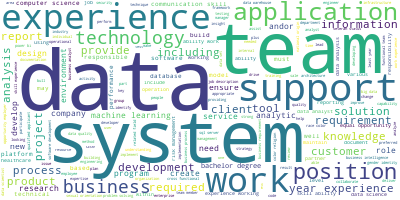

In [50]:
#create wordcloud image of words appearing in the descriptions
#long list of words
all_words = ','.join(list(data['clean_desc'].values))
#word cloud object
wc = WordCloud(background_color='white', max_words=1500, contour_width=3, contour_color='teal')
wc.generate(all_words)
#visualize
wc.to_image()

In [ ]:
#save to file for other use
wc.to_file('wordcloud.png')

A quick review of the corpus shows the most common words in the job descriptions. From the glance, the following seem most prominent:
> Data, team, system, work, position, business, experience, application, technology, position,provide, including, knowledge

Most of these words do not really tell us anything about eligibility at this point, so there is a need to trim and remove the most common appearing words because they cannot be used as differentiators in the job descriptions. Next, we attempt to implement latent Dirichlet allocation to this unlabeled data to reduce the features and see how distinguishable the descriptions are at all.